In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
base_path = '/zhome/ac/d/174101/thesis'

In [3]:
df = pd.read_excel(f"{base_path}/data/imageAnalysis_information.xlsx")
df  = pd.DataFrame(df.values[1:], columns=df.iloc[0])
df.head()

0 event_id IBT number        genus      species start date    end date  \
0   ima001  IBT 12085  Penicillium      smithii  2023-02-20 2023-02-27   
1   ima001  IBT 13516  Penicilluim      bilaiae  2023-02-20 2023-02-27   
2   ima001  IBT 21948  Penicilluim  malodoratum  2023-02-20 2023-02-27   
3   ima001  IBT 21902  Aspergillus   astellatus  2023-02-20 2023-02-27   
4   ima001     NID174  Aspergillus     nidulans  2023-02-20 2023-02-27   

0 date of picture image no video temperature picture interval comments  \
0           day 4      192   NaN          25           30 min      NaN   
1           day 4      192   NaN          25           30 min      NaN   
2           day 4      192   NaN          25           30 min      NaN   
3           day 4      192   NaN          25           30 min      NaN   
4           day 4      192   NaN          25           30 min      NaN   

0 Reshape Job ID Reshape plate position Ofba reference list Comments  
0            NaN                    NaN                 NaN      NaN  
1            NaN                    NaN                 NaN      NaN  
2            NaN                    NaN                 NaN      NaN  
3            NaN                    NaN                 NaN      NaN  
4            NaN                    NaN                 NaN      NaN

In [4]:
# Strip the blank spaces from names
df['species'] = df['species'].str.strip()
df['genus'] = df['genus'].str.strip()

In [8]:
# Count the occurrences
species_count = df['species'].value_counts()
genus_count = df['genus'].value_counts()
date_of_count = df['date of picture'].value_counts()
image_number_count = df['image no'].value_counts()


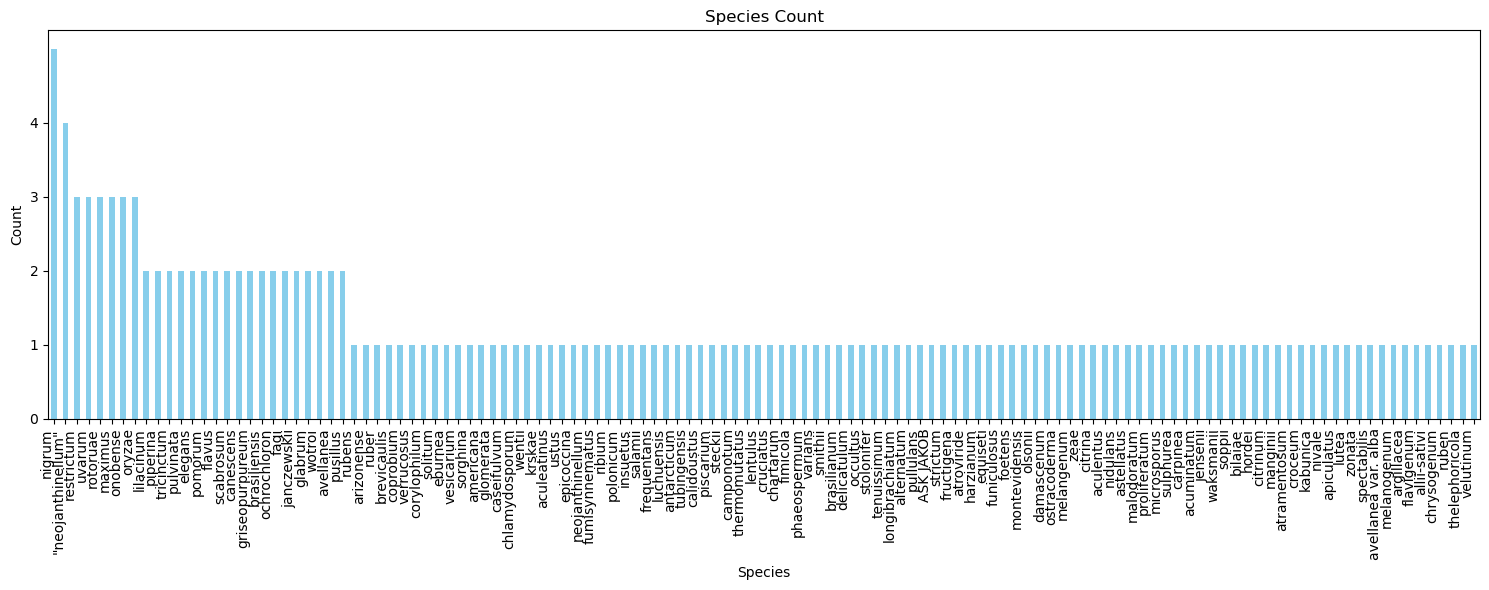

In [9]:
plt.figure(figsize=(15, 6))

# Plot for species count
species_count.plot(kind='bar', color='skyblue')
plt.title('Species Count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.yticks([0,1,2,3,4])

plt.tight_layout()
plt.show()
#Add table on the side

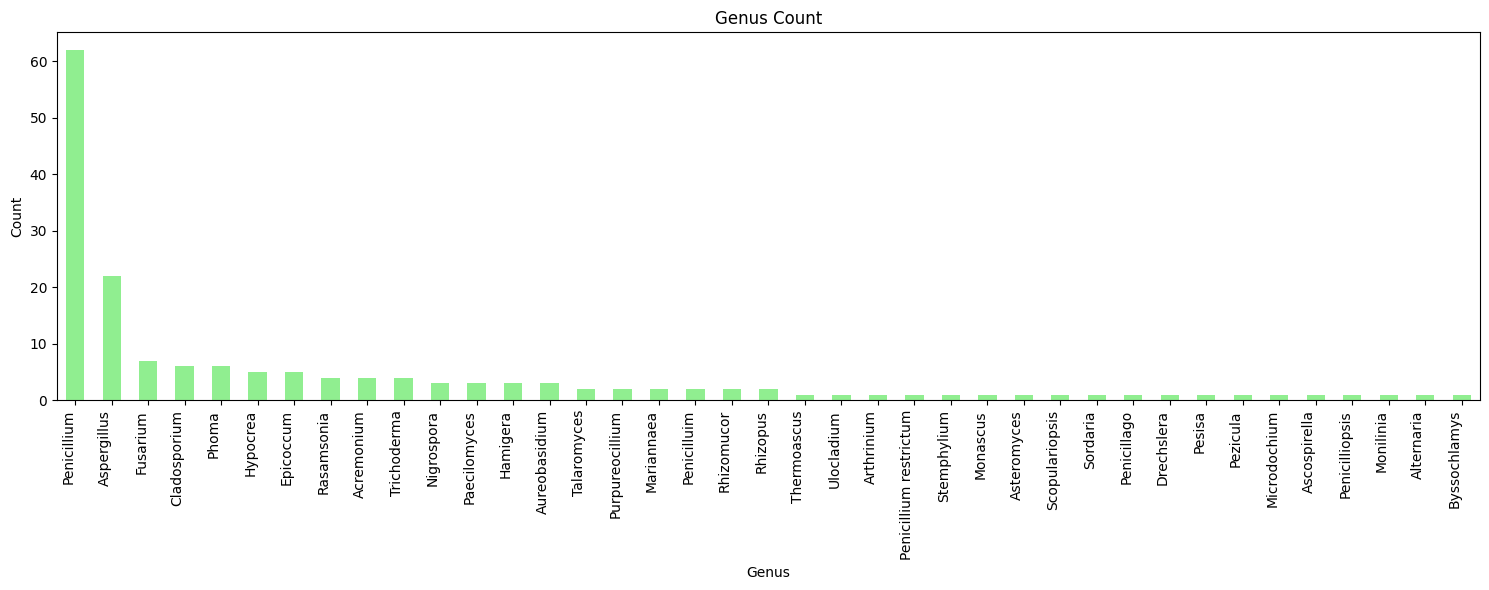

In [9]:
plt.figure(figsize=(15, 6))

# Plot for genus count
genus_count.plot(kind='bar', color='lightgreen', )
plt.title('Genus Count')
plt.xlabel('Genus')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

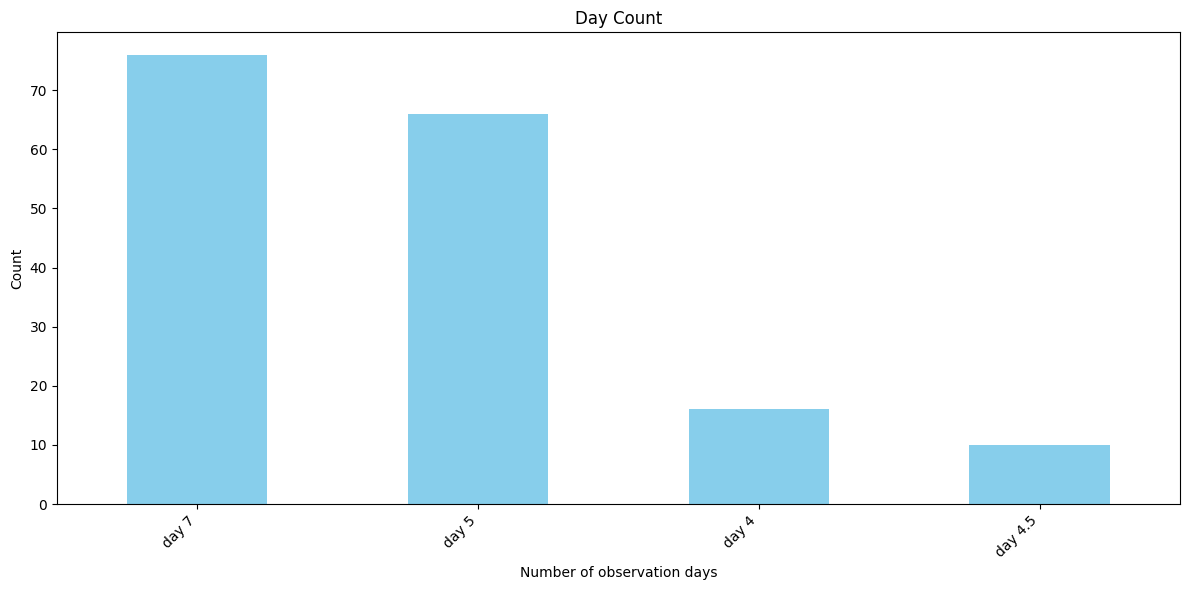

In [10]:
plt.figure(figsize=(12, 6))

# Plot for days of observation count
date_of_count.plot(kind='bar', color='skyblue')
plt.title('Day Count')
plt.xlabel('Number of observation days')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

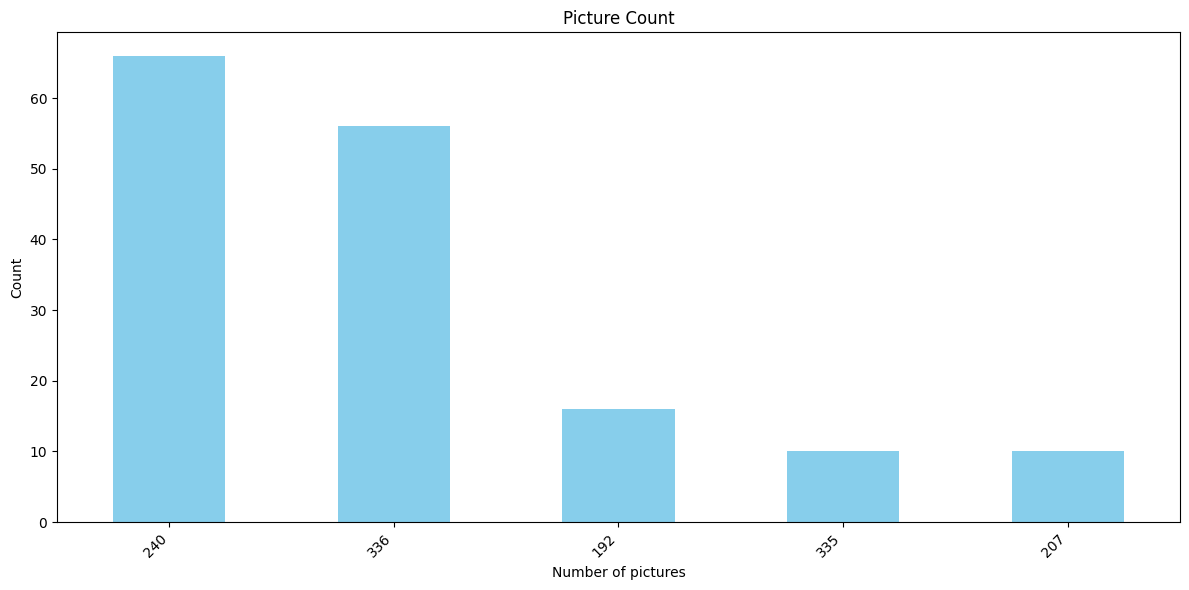

In [11]:
plt.figure(figsize=(12, 6))

# Plot for number of pictures count
image_number_count.plot(kind='bar', color='skyblue')
plt.title('Picture Count')
plt.xlabel('Number of pictures')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [12]:
# Group species by genus and count the number of species
genus_species_count_table = df.groupby('genus')['species'].agg(['count']).reset_index()

# Calculate the total count of species
total_species_count = genus_species_count_table['count'].sum()

# Create a DataFrame for the total count
sum_row = pd.DataFrame({'genus': ['Total'], 'count': [total_species_count]})

# Concatenate the total count row
genus_species_count_table = pd.concat([genus_species_count_table, sum_row], ignore_index=True)
genus_species_count_table

genus  count
0               Acremonium      3
1               Alternaria      0
2               Arthrinium      1
3             Ascospirella      1
4              Aspergillus     22
5              Asteromyces      1
6            Aureobasidium      3
7             Byssochlamys      1
8             Cladosporium      3
9               Drechslera      0
10               Epicoccum      5
11                Fusarium      7
12                Hamigera      3
13                Hypocrea      5
14              Mariannaea      2
15            Microdochium      1
16                Monascus      1
17               Monilinia      1
18              Nigrospora      3
19            Paecilomyces      3
20             Penicillago      1
21          Penicilliopsis      1
22             Penicillium     62
23  Penicillium restrictum      0
24             Penicilluim      2
25                  Pesisa      1
26                Pezicula      1
27                   Phoma      6
28         Purpureocillium      2
29              Rasamsonia      4
30              Rhizomucor      2
31                Rhizopus      2
32          Scopulariopsis      1
33                Sordaria      1
34             Stemphylium      1
35             Talaromyces      2
36             Thermoascus      1
37             Trichoderma      4
38              Ulocladium      1
39                   Total    161

In [12]:
genus_species_count = df.groupby('genus')['species'].agg(['count']).reset_index()

genus_species_count = genus_species_count[genus_species_count['genus'] != 'Total']

fig = go.Figure(go.Treemap(
    labels=genus_species_count['genus'],
    parents=[''] * len(genus_species_count['genus']),
    values=genus_species_count['count'],
    textinfo="label+value"
))

fig.update_layout(
    title="Genus-Species Relationship",
    treemapcolorway=["SkyBlue", "LightGray"],  # Adjust colors as needed
)

fig.show()

In [13]:
date_genus_count = df.groupby(['date of picture', 'species']).size().reset_index(name='count')

fig = go.Figure()

for category in date_genus_count['date of picture'].unique():
    data_category = date_genus_count[date_genus_count['date of picture'] == category]
    fig.add_trace(go.Bar(
        x=data_category['species'],
        y=data_category['count'],
        name=category
    ))

fig.update_layout(
    title="Length of obeservation for each Genus",
    xaxis_title="Species",
    yaxis_title="Number of experiments",
    barmode='stack'  # To stack bars for different categories
)

fig.show()

(-0.5, 4090.5, 6137.5, -0.5)

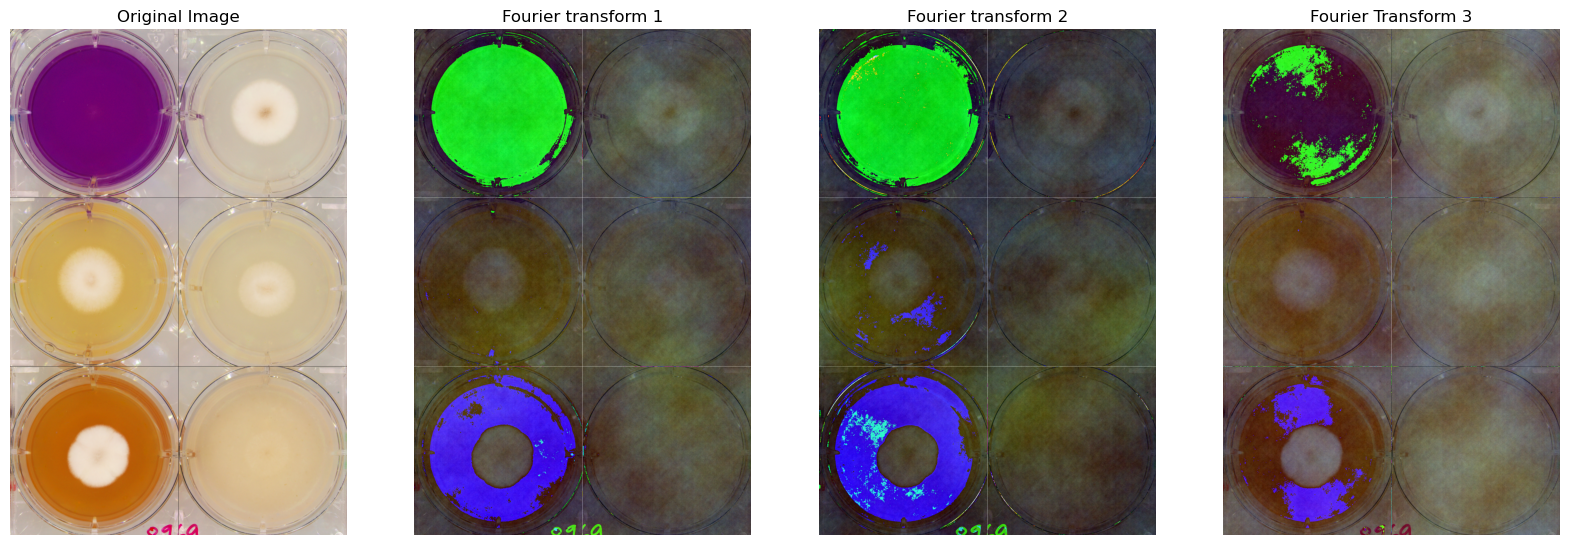

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_fourier_noise(image):
    # Convert image to float32 and scale to range [0, 1]
    img_float32 = image.astype(np.float32) / 255.0

    # generate noise image
    noise_image = np.random.rand(*image[:,:,0].shape)

    # Split image into channels
    channels = cv2.split(img_float32)
    modified_channels = []

    for channel in channels:
        # Perform Fourier Transform on the channel
        dft = cv2.dft(channel, flags=cv2.DFT_COMPLEX_OUTPUT)
        
        # Split complex values into magnitude and phase
        magnitude, phase = cv2.cartToPolar(dft[:, :, 0], dft[:, :, 1])
        
        # Multiply magnitude by the noise
        magnitude_noise = np.array(magnitude) * np.array(noise_image)
        
        # Reconstruct complex values
        complex_dft_noise = cv2.merge([magnitude_noise * np.cos(phase), magnitude_noise * np.sin(phase)])
        
        # Perform inverse Fourier Transform
        inverse_dft = cv2.idft(complex_dft_noise, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
        
        # Ensure resulting image has real values and scale back to [0, 1]
        modified_channel = np.real(inverse_dft)
        modified_channels.append(modified_channel)
    
    # Combine modified channels into an RGB image
    modified_image = cv2.merge(modified_channels)
    
    # Scale back to range [0, 255] and convert to uint8
    modified_image = np.uint8(modified_image * 255)
    
    return modified_image

# Example usage
image = cv2.imread('/work3/s220243/Thesis/images/IBT 8969/RIS1_0_TL_20_preset/154.jpeg')
modified_image = add_fourier_noise(image)
modified_image_2 = add_fourier_noise(image)
modified_image_3 = add_fourier_noise(image)

# Display original and modified images using matplotlib
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
plt.title('Fourier transform 1')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(modified_image_2, cv2.COLOR_BGR2RGB))
plt.title('Fourier transform 2')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(modified_image_3, cv2.COLOR_BGR2RGB))
plt.title('Fourier Transform 3')
plt.axis('off')

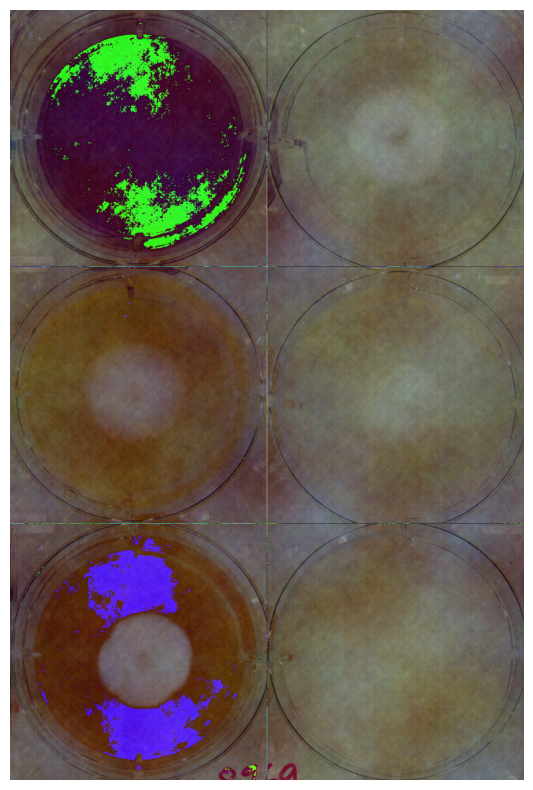

In [9]:
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(modified_image_3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig(f'/work3/s220243/Thesis/images_to_export/Fourier_4.png')

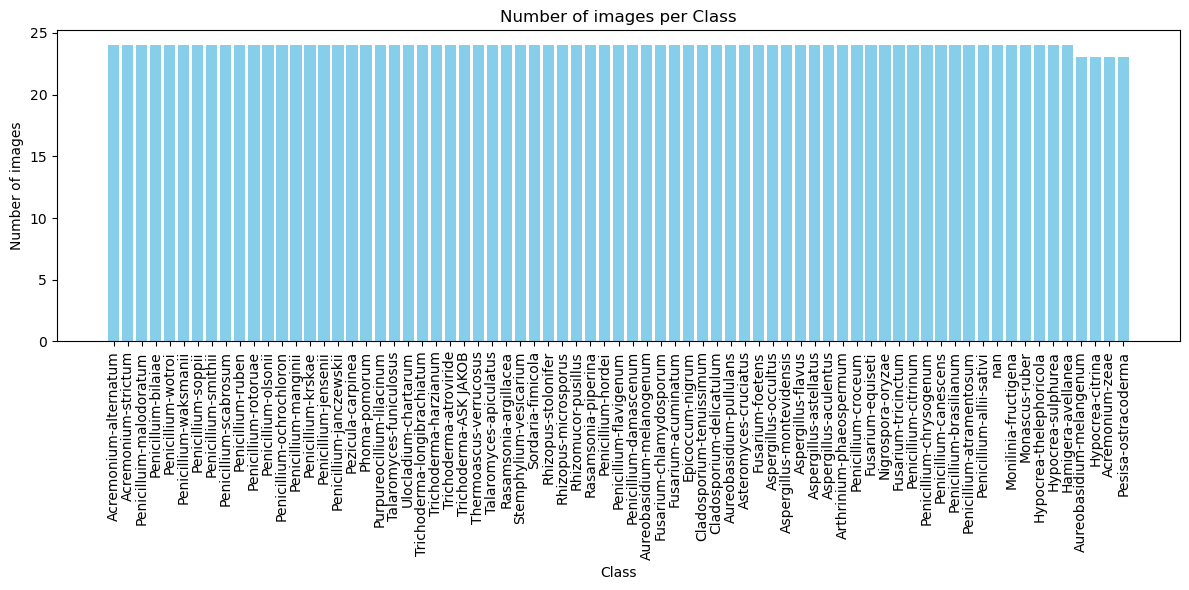

                        Class  image_Count IBT_number Image number
0     Penicilluim-malodoratum           24  IBT 21948          192
1         Penicilluim-bilaiae           24  IBT 13516          192
2          Penicillium-wotroi           24  IBT 23253          335
3          Penicillium-wotroi           24  IBT 23255          335
4         Penicillium-smithii           24  IBT 12085          192
5        Penicillium-rotoruae           24  IBT 35839          335
6        Penicillium-rotoruae           24  IBT 35695          335
7        Penicillium-rotoruae           24  IBT 36523          335
8         Penicillium-olsonii           24  IBT 32786          335
9    Penicillium-ochrochloron           24  IBT 26878          NaN
10   Penicillium-ochrochloron           24  IBT 35099          NaN
11       Penicillium-jensenii           24  IBT 36721          240
12  Purpureocillium-lilacinum           24  IBT 32197          336
13    Talaromyces-funiculosus           24  IBT 32842         

In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

base_path = Path('/work3/s220243/Thesis/data_split_resized/validation') #data_split_lbp or data_split_resized

image_paths = list(base_path.glob('**/*.jpeg'))

classes = []
file_names = []

for path in image_paths:
    
    class_name = path.parent.name
    file_name = path.stem
    
    
    classes.append(class_name)
    file_names.append(file_name)

df = pd.DataFrame({'Class': classes, 'File_Name': file_names})

df['Image_ID'] = df['Class'] + '_' + df['File_Name']

df = df.drop_duplicates(subset='Image_ID')

df = df.drop(columns=['Image_ID'])

class_counts = df.groupby('Class').size().reset_index(name='image_Count')
class_counts_sorted = class_counts.sort_values(by='image_Count', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(class_counts_sorted['Class'], class_counts_sorted['image_Count'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Number of images per Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

df = pd.read_excel('/zhome/ac/d/174101/thesis/data/imageAnalysis_information.xlsx')
df  = pd.DataFrame(df.values[1:], columns=df.iloc[0])

species_genus_df = pd.DataFrame({"IBT_number": df['IBT number'],
                          "Target" : df["genus"]+"-"+df["species"],
                          "Image number" : df["image no"]})
species_genus_df.dropna() 

merged_df = pd.merge(class_counts_sorted, species_genus_df, left_on='Class', right_on='Target', how='inner')
merged_df = merged_df.drop(columns=['Target'])

print(merged_df)

In [ ]:
#IBT numbers that have the same Genus-Species and plot the difference, plot the distribution of the traning set.
#Cross validation? DenseNet + 4th channel (texture analysis)
#Move the repo to the department one!

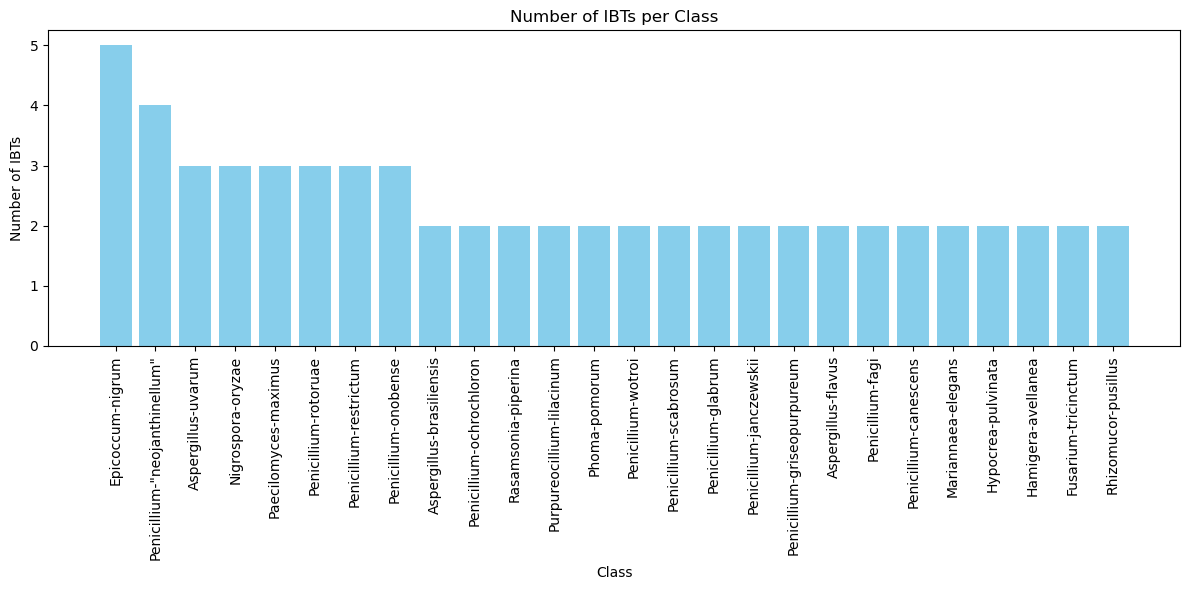

Target  \
31                Epicoccum-nigrum   
52   Penicillium-"neojanthinellum"   
21              Aspergillus-uvarum   
48               Nigrospora-oryzae   
49            Paecilomyces-maximus   
85            Penicillium-rotoruae   
83          Penicillium-restrictum   
80            Penicillium-onobense   
8         Aspergillus-brasiliensis   
78        Penicillium-ochrochloron   
109            Rasamsonia-piperina   
106      Purpureocillium-lilacinum   
104                  Phoma-pomorum   
96              Penicillium-wotroi   
89           Penicillium-scabrosum   
70             Penicillium-glabrum   
73         Penicillium-janczewskii   
71     Penicillium-griseopurpureum   
10              Aspergillus-flavus   
67                Penicillium-fagi   
59           Penicillium-canescens   
44              Mariannaea-elegans   
41              Hypocrea-pulvinata   
38              Hamigera-avellanea   
37             Fusarium-tricinctum   
110            Rhizomucor-pusillus   

                                           IBT_numbers  Different IBTs  
31   [IBT 40303, IBT 23138, IBT 41379, IBT 42473, I...               5  
52        [IBT 36699, IBT 36700, IBT 36701, IBT 36702]               4  
21                   [IBT 27814, IBT 27815, IBT 27816]               3  
48                   [IBT 42791, IBT 42908, IBT 41642]               3  
49                   [IBT 26960, IBT 26963, IBT 26964]               3  
85                   [IBT 35839, IBT 35695, IBT 36523]               3  
83                   [IBT 36706, IBT 36707, IBT 36708]               3  
80                   [IBT 36703, IBT 36704, IBT 36705]               3  
8                               [IBT 27957, IBT 27959]               2  
78                              [IBT 26878, IBT 35099]               2  
109                             [IBT 31686, IBT 31686]               2  
106                             [IBT 36730, IBT 32197]               2  
104                             [IBT 41495, IBT 41556]               2  
96                              [IBT 23253, IBT 23255]               2  
89                              [IBT 36712, IBT 36711]               2  
70                              [IBT 30056, IBT 30470]               2  
73                              [IBT 36713, IBT 36714]               2  
71                              [IBT 27945, IBT 32049]               2  
10                              [IBT 36710, IBT 36709]               2  
67                              [IBT 27943, IBT 29854]               2  
59                              [IBT 36715, IBT 36716]               2  
44                              [IBT 27374, IBT 27374]               2  
41                              [IBT 41758, IBT 41850]               2  
38                              [IBT 26575, IBT 34882]               2  
37                              [IBT 42760, IBT 41919]               2  
110                             [IBT 42145, IBT 42145]               2

In [51]:
IBTs_df = pd.DataFrame({"IBT_number": df['IBT number'],
                          "Target" : df["genus"]+"-"+df["species"]})

IBTs_df.dropna()

# Group by the 'Target' column and aggregate 'IBT_number' into a list
grouped_df = IBTs_df.groupby('Target').agg({
    'IBT_number': lambda x: list(x)
}).reset_index()

# Rename the aggregated column if needed
grouped_df = grouped_df.rename(columns={'IBT_number': 'IBT_numbers'})

grouped_df['Different IBTs'] = grouped_df['IBT_numbers'].apply(len)

filtered_df = grouped_df[grouped_df['Different IBTs'] > 1]

filtered_df = filtered_df.sort_values(by='Different IBTs', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(filtered_df['Target'], filtered_df['Different IBTs'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of IBTs')
plt.title('Number of IBTs per Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

filtered_df

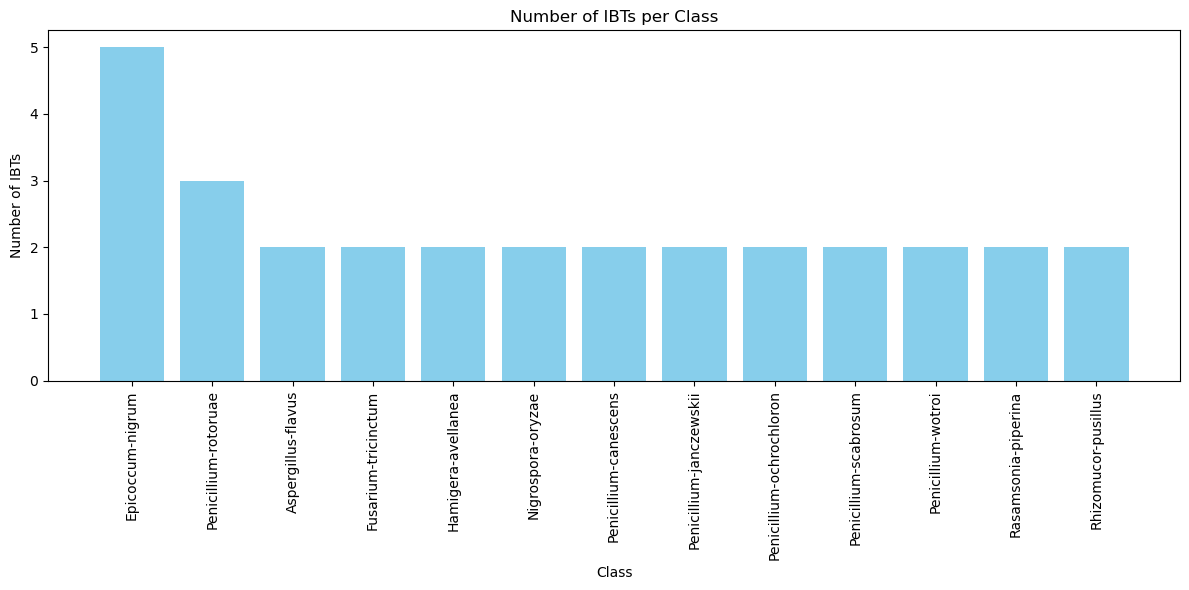

Target  \
15          Epicoccum-nigrum   
44      Penicillium-rotoruae   
6         Aspergillus-flavus   
20       Fusarium-tricinctum   
21        Hamigera-avellanea   
27         Nigrospora-oryzae   
31     Penicillium-canescens   
38   Penicillium-janczewskii   
42  Penicillium-ochrochloron   
46     Penicillium-scabrosum   
50        Penicillium-wotroi   
58       Rasamsonia-piperina   
59       Rhizomucor-pusillus   

                                          IBT_numbers  Different IBTs  
15  [IBT 40303, IBT 23138, IBT 41379, IBT 42473, I...               5  
44                  [IBT 35839, IBT 35695, IBT 36523]               3  
6                              [IBT 36710, IBT 36709]               2  
20                             [IBT 42760, IBT 41919]               2  
21                             [IBT 26575, IBT 34882]               2  
27                             [IBT 42791, IBT 42908]               2  
31                             [IBT 36715, IBT 36716]               2  
38                             [IBT 36713, IBT 36714]               2  
42                             [IBT 26878, IBT 35099]               2  
46                             [IBT 36712, IBT 36711]               2  
50                             [IBT 23253, IBT 23255]               2  
58                             [IBT 31686, IBT 31686]               2  
59                             [IBT 42145, IBT 42145]               2

In [58]:
from pathlib import Path
import re

ibt_numbers=[]
img_paths=[]

img_path = '/work3/s220243/Thesis'

# Get a list of all the images paths
img = Path(f"{img_path}/images")
paths = list(img.glob('**/*.jpeg'))

# Create list of all IBTs and paths to images for the given IBT
for path in paths:
  match = re.search(r'IBT \d+',str(path))
  if match:
    ibt_numbers.append(match.group())
    img_paths.append(str(path))
  else:
    ibt_numbers.append("ACU1")
    img_paths.append(str(path))

    # Create DF from a lists
paths_df = pd.DataFrame({"IBT_number": ibt_numbers,
                     "path": img_paths})

# Merge target_df and paths_df
paths_df = paths_df.groupby('IBT_number')['path'].apply(list).reset_index()
merged_df = pd.merge(IBTs_df, paths_df, on='IBT_number', how='inner')
#merged_df.drop(columns=['path'])

# Group by the 'Target' column and aggregate 'IBT_number' into a list
grouped_df = merged_df.groupby('Target').agg({
    'IBT_number': lambda x: list(x),
}).reset_index()

# Rename the aggregated column if needed
grouped_df = grouped_df.rename(columns={'IBT_number': 'IBT_numbers'})

grouped_df['Different IBTs'] = grouped_df['IBT_numbers'].apply(len)

filtered_df = grouped_df[grouped_df['Different IBTs'] > 1]

filtered_df = filtered_df.sort_values(by='Different IBTs', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(filtered_df['Target'], filtered_df['Different IBTs'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of IBTs')
plt.title('Number of IBTs per Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

filtered_df

IBT_number                   Target  \
0   IBT 12085      Penicillium-smithii   
1   IBT 13516      Penicilluim-bilaiae   
2   IBT 21948  Penicilluim-malodoratum   
3   IBT 21902   Aspergillus-astellatus   
4        ACU1    Aspergillus-aculentus   
..        ...                      ...   
89  IBT 31686      Rasamsonia-piperina   
90   IBT 7737  Arthrinium-phaeospermum   
91   IBT 8121        Sordaria-fimicola   
92   IBT 9051     Ulocladium-chartarum   
93   IBT 9212    Asteromyces-cruciatus   

                                                 path  
0   [/work3/s220243/Thesis/images/IBT 12085/IBT120...  
1   [/work3/s220243/Thesis/images/IBT 13516/IBT 13...  
2   [/work3/s220243/Thesis/images/IBT 21948/IBT 21...  
3   [/work3/s220243/Thesis/images/IBT 21902/IBT 21...  
4   [/work3/s220243/Thesis/images/ACU1/ACU1.jpeg, ...  
..                                                ...  
89  [/work3/s220243/Thesis/images/IBT 31686/RIS1_0...  
90  [/work3/s220243/Thesis/images/IBT 7737/RIS1_0_...  
91  [/work3/s220243/Thesis/images/IBT 8121/RIS1_0_...  
92  [/work3/s220243/Thesis/images/IBT 9051/RIS1_0_...  
93  [/work3/s220243/Thesis/images/IBT 9212/RIS1_0_...  

[94 rows x 3 columns]